In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def apply_iqr_capping(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Primjena cappinga
    # Sve vrijednosti manje od donje granice postaju donja granica
    # Sve vrijednosti veće od gornje granice postaju gornja granica
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_series

In [3]:
webshop = pd.read_csv ("webshop_outliers.csv")

In [4]:
webshop.head()

,Unnamed: 0,Vrijeme_na_Stranici_min,Broj_Klikova,Broj_Pregledanih_Proizvoda,Potrošeno_EUR,Ocjena_Korisnickog_Iskustva
0,0,10,58,1,305.86,7
1,1,5,48,21,92.30,7
2,2,17,70,8,60.46,8
3,3,12,64,13,120000.00,8
4,4,14,78,35,89.36,9


In [5]:
webshop.describe ()

,Unnamed: 0,Vrijeme_na_Stranici_min,Broj_Klikova,Broj_Pregledanih_Proizvoda,Potrošeno_EUR,Ocjena_Korisnickog_Iskustva
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,17.490000,68.610000,24.643333,906.617700,7.896667
std,86.746758,13.380584,115.095589,58.703462,8808.073068,1.510052
min,0.000000,2.000000,-5.000000,1.000000,-10.000000,1.000000
25%,74.750000,11.000000,49.000000,2.000000,83.010000,7.000000
50%,149.500000,15.000000,58.000000,6.000000,147.150000,8.000000
75%,224.250000,19.000000,67.250000,17.000000,248.497500,9.000000
max,299.000000,89.000000,1500.000000,387.000000,120000.000000,10.000000


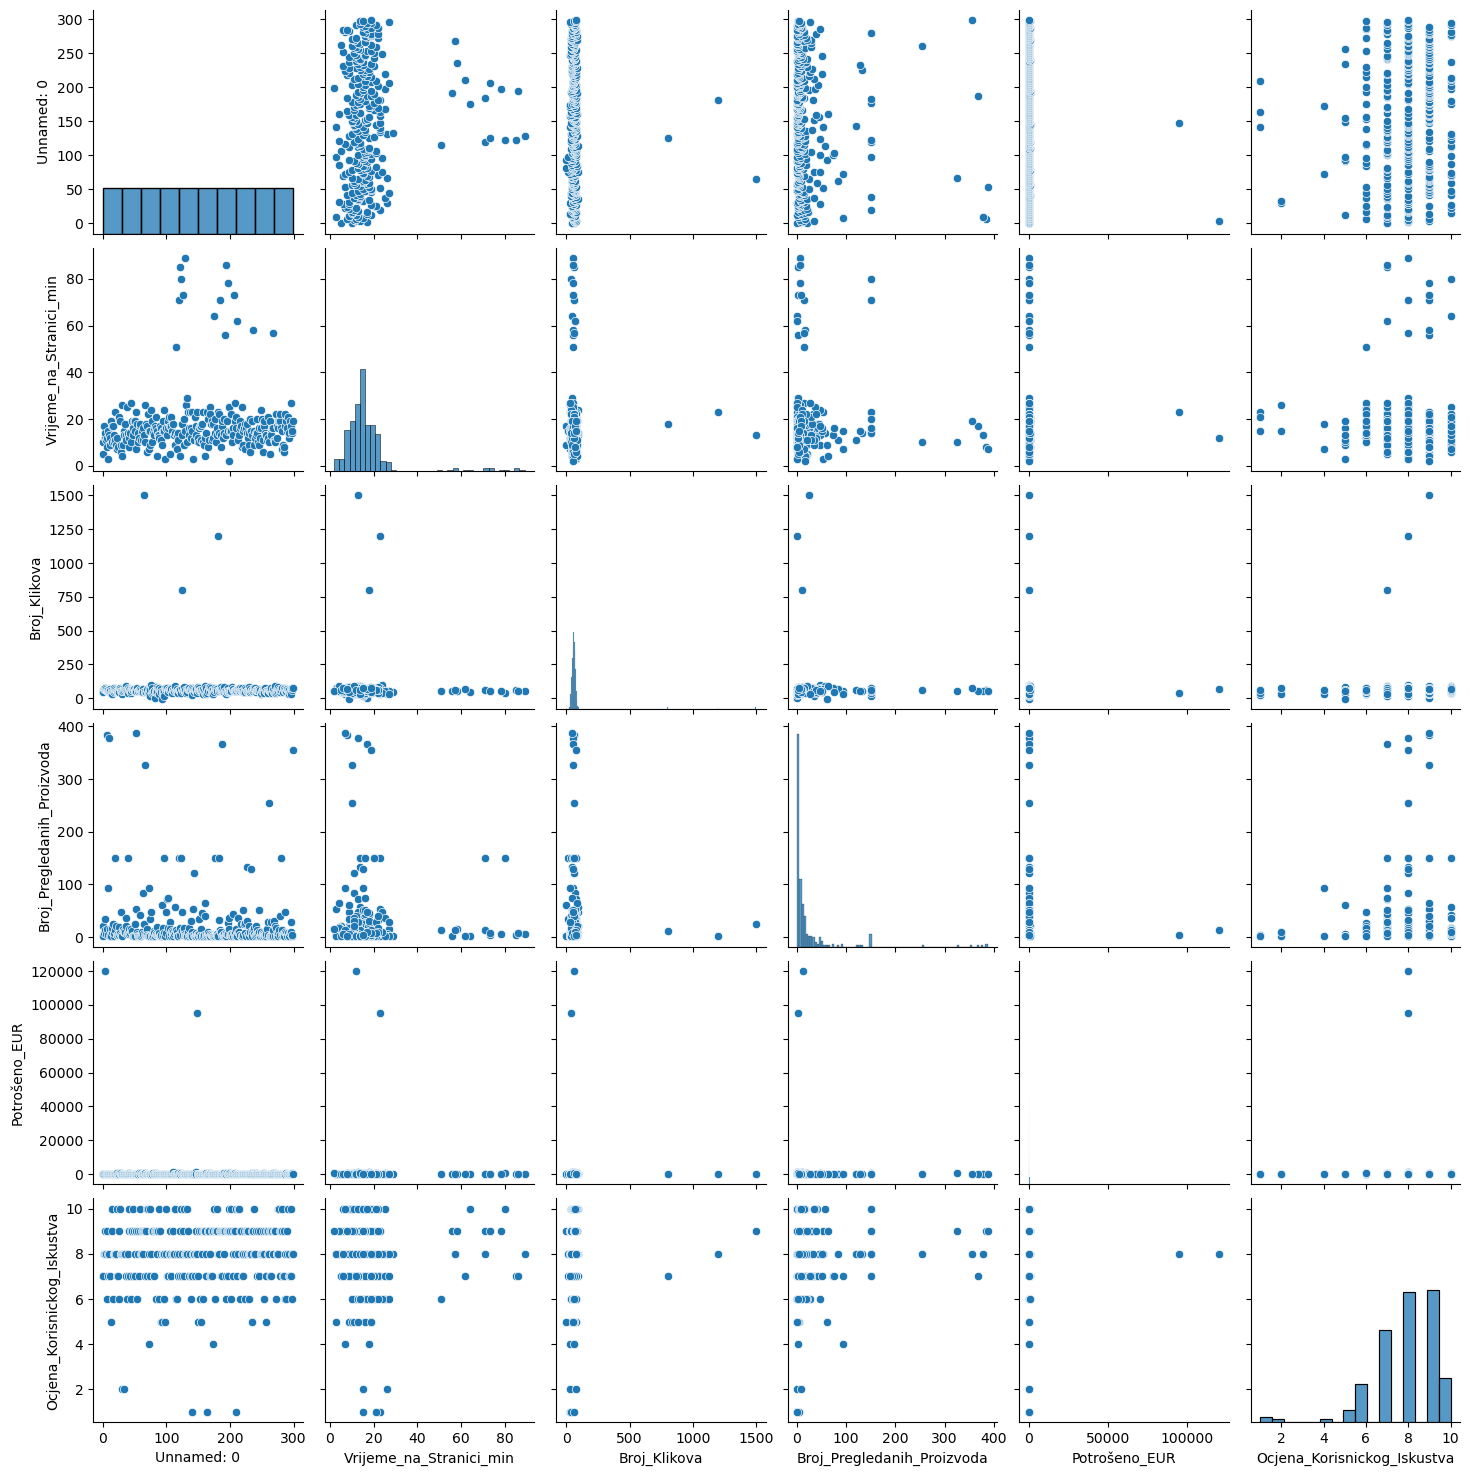

In [6]:
sns.pairplot (webshop)

(array([ 59., 180.,  45.,   1.,   0.,   1.,   4.,   3.,   4.,   3.]),
 array([ 2. , 10.7, 19.4, 28.1, 36.8, 45.5, 54.2, 62.9, 71.6, 80.3, 89. ]),
 <BarContainer object of 10 artists>)

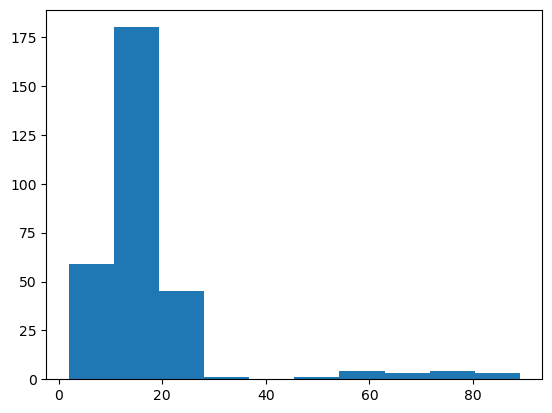

In [7]:
plt.hist (webshop.Vrijeme_na_Stranici_min)

(array([297.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.]),
 array([  -5. ,  145.5,  296. ,  446.5,  597. ,  747.5,  898. , 1048.5,
        1199. , 1349.5, 1500. ]),
 <BarContainer object of 10 artists>)

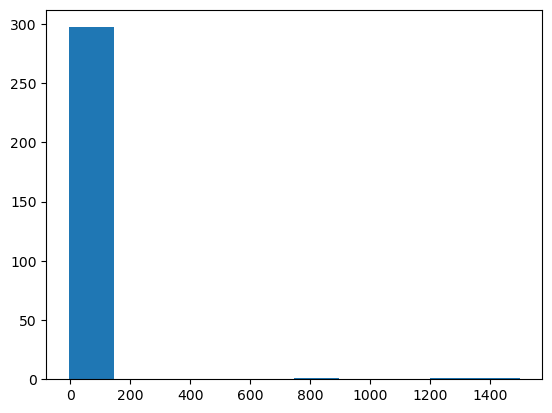

In [8]:
plt.hist (webshop.Broj_Klikova)

(array([262.,  17.,   3.,  11.,   0.,   0.,   1.,   0.,   1.,   5.]),
 array([  1. ,  39.6,  78.2, 116.8, 155.4, 194. , 232.6, 271.2, 309.8,
        348.4, 387. ]),
 <BarContainer object of 10 artists>)

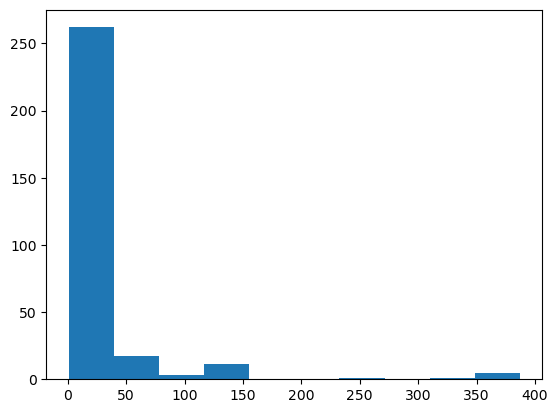

In [9]:
plt.hist (webshop.Broj_Pregledanih_Proizvoda)

In [10]:
webshop_capped = webshop.copy()

In [16]:
for col in ['Broj_Klikova', 'Broj_Pregledanih_Proizvoda', 'Potrošeno_EUR']:
    webshop_capped[col] = apply_iqr_capping(webshop_capped[col])

In [15]:
webshop_capped.describe()

,Unnamed: 0,Vrijeme_na_Stranici_min,Broj_Klikova,Broj_Pregledanih_Proizvoda,Potrošeno_EUR,Ocjena_Korisnickog_Iskustva
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,17.490000,58.101250,12.270000,184.117692,7.896667
std,86.746758,13.380584,14.004259,13.234144,133.249250,1.510052
min,0.000000,2.000000,21.625000,1.000000,-10.000000,1.000000
25%,74.750000,11.000000,49.000000,2.000000,83.010000,7.000000
50%,149.500000,15.000000,58.000000,6.000000,147.150000,8.000000
75%,224.250000,19.000000,67.250000,17.000000,248.497500,9.000000
max,299.000000,89.000000,94.625000,39.500000,496.728750,10.000000


In [13]:
webshop.head(50)

,Unnamed: 0,Vrijeme_na_Stranici_min,Broj_Klikova,Broj_Pregledanih_Proizvoda,Potrošeno_EUR,Ocjena_Korisnickog_Iskustva
0,0,10,58,1,305.86,7
1,1,5,48,21,92.30,7
2,2,17,70,8,60.46,8
3,3,12,64,13,120000.00,8
4,4,14,78,35,89.36,9
5,5,11,67,6,199.69,8
6,6,12,51,16,104.44,6
7,7,8,63,383,210.84,9
8,8,15,56,94,55.67,7
9,9,3,62,3,171.97,8
